In [1]:
from pathlib import Path
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.data_sources.csv_dataset_repository import CSVDatasetRepository 

# Configure logging
configure_logging(env="dev")

# Get repository root path
root = get_repository_root()

# Load configuration
config_loader = YamlConfigLoader()
paths = config_loader.load_config(f"{root}/configs/paths.yaml")
train_paths = get_repository_root() / Path(paths["data"]["input"]["train_dataset"])

# Initialize Logger
logger = LoguruLogger()

# Load Dataset fron CSV file
csv_repo = CSVDatasetRepository(logger=logger,source_path=train_paths) 

# Lit le fichier CSV et le charge en mémoire (DataFrame Pandas).
data = csv_repo.load_dataset()

# Show the 5 first rows
display(data.head()) # Affiche les 5 premières lignes pour validation.
print(f"le dataset chargé a {data.shape[0]} lignes et {data.shape[1]} colonnes")

2025-12-28 14:34:34 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-28 14:34:34 | INFO     | csv_dataset_repository.py:56 | load_dataset() | Chargement du dataset depuis : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/data/input/train.csv | {}
2025-12-28 14:34:35 | INFO     | csv_dataset_repository.py:63 | load_dataset() | Dataset chargé avec succès (77837 lignes, 31 colonnes). | {}


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,48,92,131,85,104,7.59,5.21,24.6,Type 2,1
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Former,2,345,6.4,...,41,127,186,109,187,12.01,6.75,25.0,Type 2,1
2,22,Other,Other,Postgraduate,Middle,Retired,Never,3,206,5.6,...,41,95,124,112,151,9.69,6.36,16.8,Pre-Diabetes,0
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,41,204,79,113,129,18.75,5.75,40.9,Pre-Diabetes,0
4,58,Female,White,Highschool,Lower-Middle,Unemployed,Never,3,152,4.2,...,46,61,92,101,162,9.11,6.52,28.8,Type 2,1


le dataset chargé a 77837 lignes et 31 colonnes


In [2]:
from health_lifestyle_diabetes.infrastructure.feature_engineering.pipeline_feature_engineering import FeatureEngineeringPipeline

pipeline = FeatureEngineeringPipeline(logger=LoguruLogger())
df_enriched = pipeline.transform(data)

# Affiche les 5 premières lignes du dataset enrichi pour validation.
display(df_enriched.head())
print(f"Le dataset d'entrainement initial avait {data.shape[1]} colonnes")
print(f"Le dataset d'entrainement fianla apres FE a desormais {df_enriched.shape[1]} colonnes")

2025-12-28 14:34:35 | INFO     | pipeline_feature_engineering.py:82 | transform() | Démarrage du pipeline complet de Feature Engineering... | {}
2025-12-28 14:34:35 | INFO     | exclusion.py:36 | drop_leakage_columns() | Vérification des colonnes à risque de data leakage... | {}
2025-12-28 14:34:35 | INFO     | exclusion.py:40 | drop_leakage_columns() | Suppression des colonnes à risque de leakage : ['diabetes_risk_score', 'diabetes_stage'] | {}
2025-12-28 14:34:35 | INFO     | base_preprocessing.py:25 | clean_categorical_variables() | Nettoyage des variables catégorielles... | {}
2025-12-28 14:34:35 | INFO     | base_preprocessing.py:32 | clean_categorical_variables() | Libellés uniformisés avec succès. | {}
2025-12-28 14:34:35 | INFO     | demographics_features.py:82 | transform() | Création des variables démographiques... | {}
2025-12-28 14:34:35 | INFO     | demographics_features.py:68 | _create_age_group() | Utilisation du découpage d'âge en 3 catégories. | {}
2025-12-28 14:34:35 

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,19,1878.5,0,0,1.411765,0.553333,1.136986,1,4,0.784946
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Ex-Smoker,2,345,6.4,...,78,4011.2,1,2,1.859375,2.300000,0.369565,0,6,1.703704
2,22,Unknown,Other,Postgraduate,Middle,Inactive,Never,3,206,5.6,...,39,2844.8,0,1,1.384615,1.373333,0.714286,0,6,1.184615
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,16,3412.6,0,3,2.157143,0.486667,0.913043,1,6,0.945205
4,58,Female,White,Highschool,Lower-Middle,Inactive,Never,3,152,4.2,...,61,2373.5,0,0,1.265957,1.013333,1.291667,0,6,0.699029


Le dataset d'entrainement initial avait 31 colonnes
Le dataset d'entrainement fianla apres FE a desormais 52 colonnes


In [3]:
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.splitters.sklearn_splitter import SklearnDatasetSplitter

# Load configuration
config_loader = YamlConfigLoader()
cfg = config_loader.load_config(f"{get_repository_root()}/configs/splitter.yaml")
print(f"Splitter configuration: {cfg['splitter']}")

logger = LoguruLogger()

splitter = SklearnDatasetSplitter(
    train_size=cfg["splitter"]["train_size"],
    target_column=cfg["splitter"]["target_column"],
    random_state=cfg["splitter"]["random_state"],
    logger=logger,
)
train_df_enriched, valid_df_enriched = splitter.split(df_enriched)
print("Dataset successfully split into training and validation sets.\n")
print(f"Train set shape: {train_df_enriched.shape}")
print(f"Validation set shape: {valid_df_enriched.shape}")

Splitter configuration: {'train_size': 0.8, 'target_column': 'diagnosed_diabetes', 'random_state': 42}
2025-12-28 14:34:38 | DEBUG    | sklearn_splitter.py:37 | __init__() | SklearnDatasetSplitter initialized | {}
2025-12-28 14:34:38 | INFO     | sklearn_splitter.py:42 | split() | Starting dataset split | {}
Dataset successfully split into training and validation sets.
2025-12-28 14:34:38 | INFO     | sklearn_splitter.py:57 | split() | Split done | train=(62269, 52) | test=(15568, 52) | {}

Train set shape: (62269, 52)
Validation set shape: (15568, 52)


In [4]:
from health_lifestyle_diabetes.infrastructure.features_selections import features_selection as fs
print(f"Applying feature selection using {len(fs.SELECTED_FEATURES)} features.")
train_df_enriched = train_df_enriched[fs.SELECTED_FEATURES + [fs.TARGET_COLUMN]]
valid_df_enriched = valid_df_enriched[fs.SELECTED_FEATURES + [fs.TARGET_COLUMN]]
print("Feature selection applied successfully.")    


# Étape 5.1 : Définition de la variable cible
TARGET = cfg["splitter"]["target_column"]

# Étape 5.2 : Création des matrices X (features) et des vecteurs y (target) pour chaque set
# Pour l'entraînement final
X_train = train_df_enriched.drop(columns=[fs.TARGET_COLUMN])
y_train = train_df_enriched[fs.TARGET_COLUMN]

# Pour la validation
X_valid = valid_df_enriched.drop(columns=[fs.TARGET_COLUMN])
y_valid = valid_df_enriched[fs.TARGET_COLUMN]

# Affichage des dimensions des matrices et vecteurs
print("Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :")
print(f"- X_train (Features d'entraînement) : {X_train.shape[0]} lignes, {X_train.shape[1]} colonnes")
print(f"- X_valid (Features de validation)  : {X_valid.shape[0]} lignes, {X_valid.shape[1]} colonnes")

print("\nÉtape 5.4 : Vérification des vecteurs cibles (y) :")
print(f"- y_train : {y_train.shape[0]} lignes")
print(f"- y_valid : {y_valid.shape[0]} lignes")

Applying feature selection using 5 features.
Feature selection applied successfully.
Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :
- X_train (Features d'entraînement) : 62269 lignes, 5 colonnes
- X_valid (Features de validation)  : 15568 lignes, 5 colonnes

Étape 5.4 : Vérification des vecteurs cibles (y) :
- y_train : 62269 lignes
- y_valid : 15568 lignes


2025-12-28 14:34:38 | INFO     | catboost_trainer.py:38 | __init__() | CatBoostTrainer initialisé avec les paramètres fournis. | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:111 | train() | Entraînement CatBoost | train_shape=(62269, 5) | valid_shape=(15568, 5) | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:127 | train() | Détection automatique des variables catégorielles : ['glucose_status'] | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:137 | train() | Démarrage de l'entraînement CatBoost. | {}
0:	learn: 0.6151952	test: 0.6147053	best: 0.6147053 (0)	total: 90.2ms	remaining: 2m 15s
100:	learn: 0.2130868	test: 0.2076083	best: 0.2076083 (100)	total: 3.48s	remaining: 48.2s
200:	learn: 0.2118468	test: 0.2075459	best: 0.2075059 (154)	total: 5.79s	remaining: 37.4s
300:	learn: 0.2099494	test: 0.2078465	best: 0.2075059 (154)	total: 8.37s	remaining: 33.3s
400:	learn: 0.2081927	test: 0.2081881	best: 0.2075059 (154)	total: 11s	remaining: 30.1s
500:	learn: 0.20672

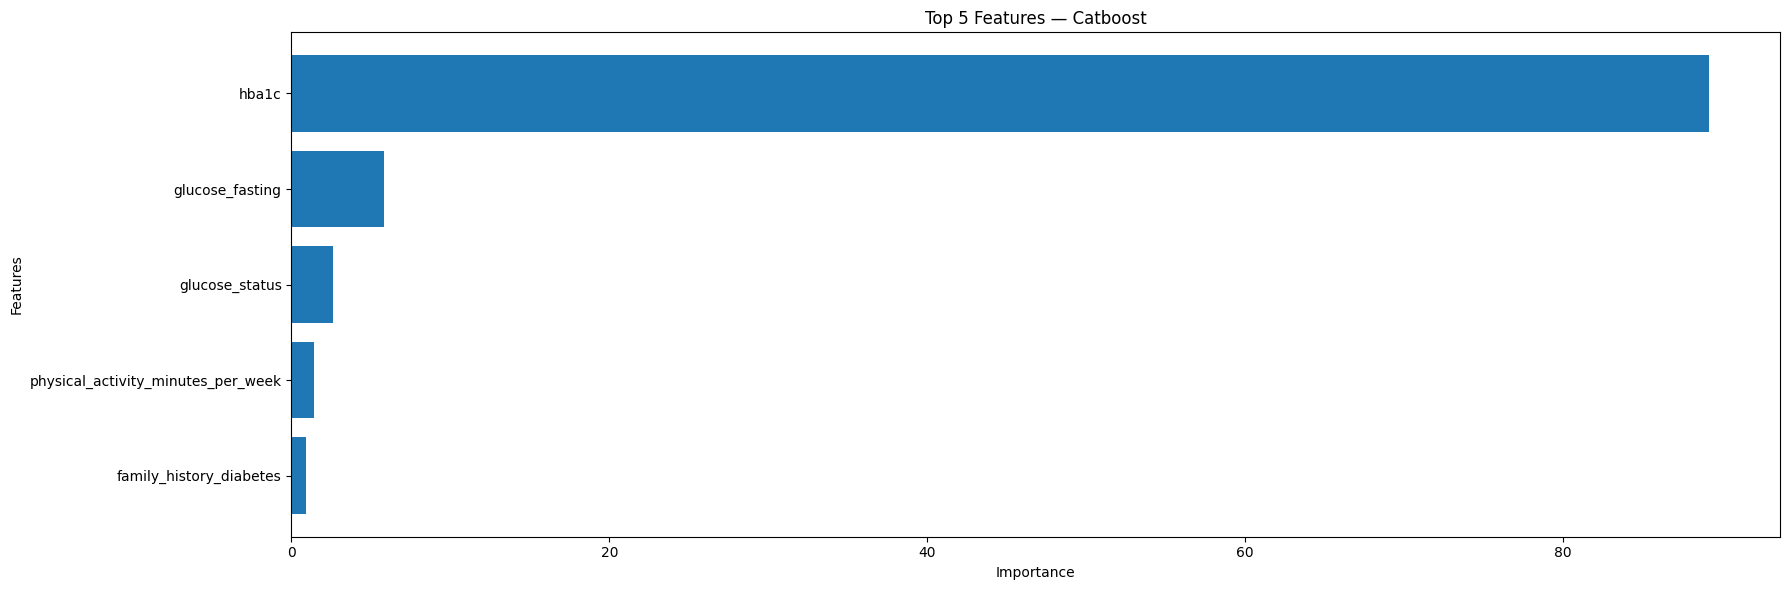

2025-12-28 14:35:18 | INFO     | feature_importance_plotter.py:57 | plot() | Affichage du barplot des feature importances terminé | {}


In [5]:
from health_lifestyle_diabetes.infrastructure.feature_importance.boosting_feature_importance_adapter import BoostingFeatureImportanceAdapter
from health_lifestyle_diabetes.infrastructure.visualization.feature_importance_plotter import FeatureImportancePlotter
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)
from health_lifestyle_diabetes.infrastructure.features_selections import features_selection as fs

logger = LoguruLogger()
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 1500,
    "learning_rate": 0.05,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "Logloss",  #"AUC"
    "verbose": 100,   # ← test du verbose
}


trainer = CatBoostTrainer(params=catboost_params,logger=logger)
model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)

# 1) Extraction
extractor = BoostingFeatureImportanceAdapter()
importances = extractor.get_feature_importances(model)  # model = CatBoost/XGB/LGBM déjà entraîné

# 2) Plot
plotter = FeatureImportancePlotter(logger)
plotter.plot(
    importances=importances,
    top_n=5,
    model_name="Catboost",
    save_plot=True,
)